## import important libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the data set

In [3]:
#load the dataset
data=pd.read_csv('Daily Household Transactions.csv')

In [4]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [31]:
data.shape

(2461, 8)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


## data cleaning


In [33]:
# Check for missing values
data.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [34]:
data["Mode"].value_counts()

Saving Bank account 1    1223
Cash                     1046
Credit Card               162
Equity Mutual Fund B       11
Share Market Trading        5
Saving Bank account 2       5
Recurring Deposit           3
Debit Card                  2
Equity Mutual Fund C        1
Equity Mutual Fund A        1
Equity Mutual Fund D        1
Fixed Deposit               1
Name: Mode, dtype: int64

In [36]:
# Fill or drop missing values
data['Category'].fillna('Unknown', inplace=True)
data.dropna(subset=['Date', 'Mode', 'Amount'], inplace=True)

In [38]:
# Convert data types
data['Date'] = pd.to_datetime(data['Date'])
data['Amount'] = data['Amount'].astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_19212\2375035445.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [39]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [40]:
# Verify data types
data.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

## Exploratory Data Analysis (EDA)1. ● Summary statistics.2. 
● Distribution of transaction amounts3. 
● Transaction counts by category and type.

In [42]:
# Summary statistics
data.describe()

,Amount
count,2452.000000
mean,2757.976664
std,12542.057491
min,2.000000
25%,35.000000
50%,100.000000
75%,784.500000
max,250000.000000


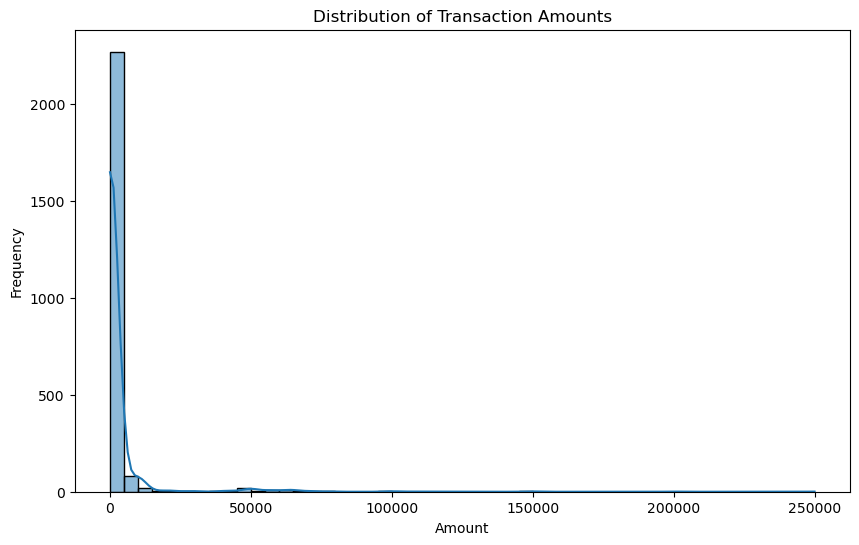

In [44]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

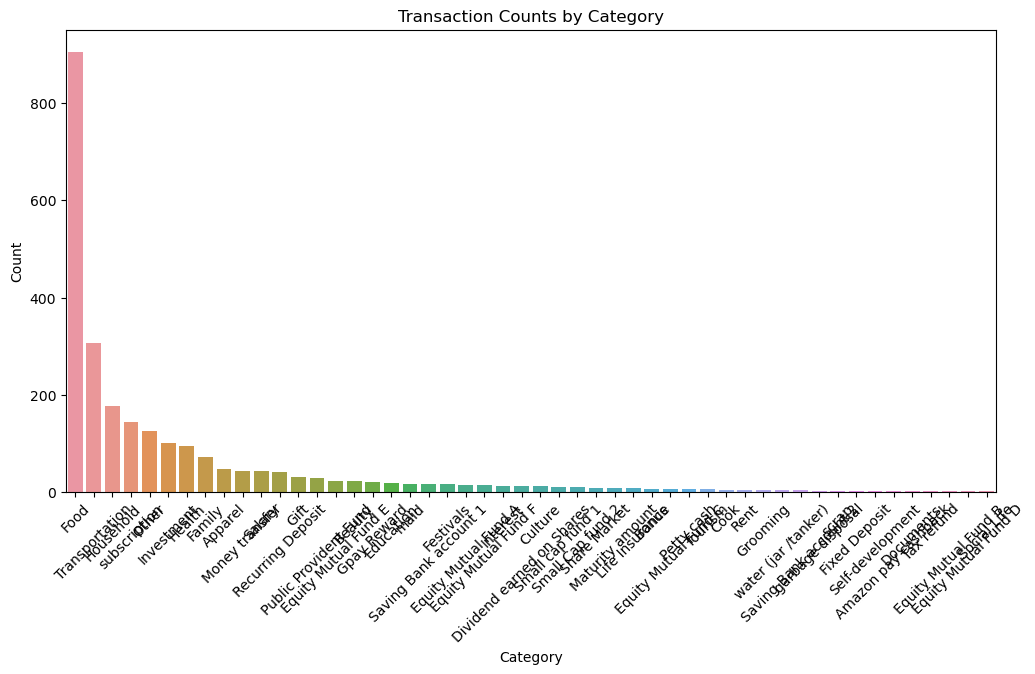

In [45]:
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.title('Transaction Counts by Category')

plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

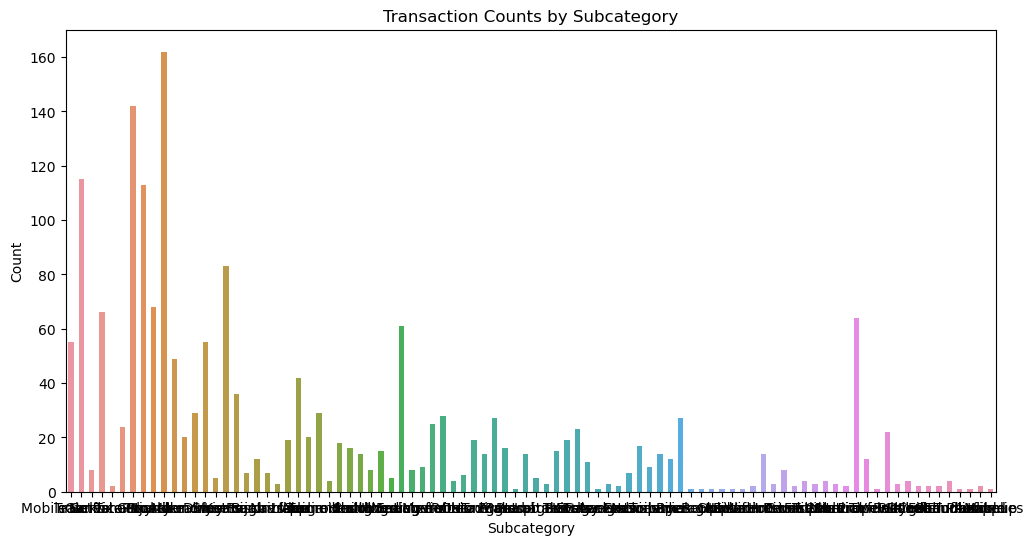

In [68]:
# Transaction counts by type
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Subcategory',width=0.5)
plt.title('Transaction Counts by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.show()

## Time Series Analysis
● Trend analysis.
● Monthly and daily trends.

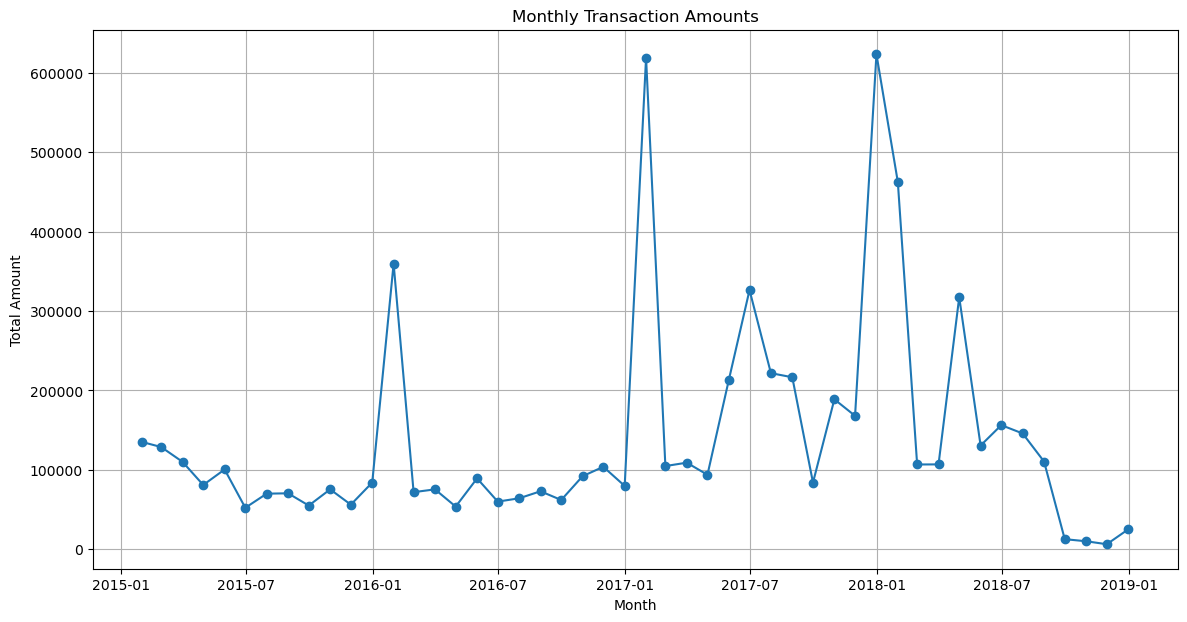

In [55]:
# Resample data to monthly frequency
monthly_data = data.resample('M', on='Date').sum(numeric_only=True)

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')

plt.grid(True)
plt.show()

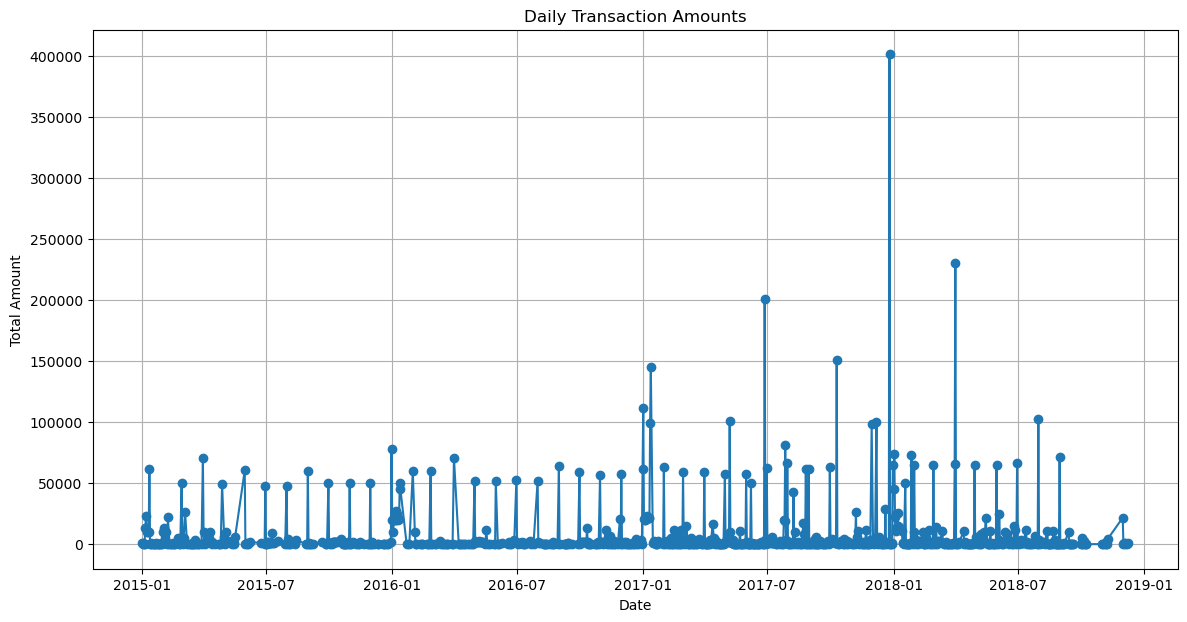

In [58]:
# Daily trends
daily_data = data.groupby(data['Date'].dt.date).sum(numeric_only=True)

plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

## Correlation Analysis
● Analyze the correlation between transaction categories and amounts.

In [59]:
# Create a pivot table for correlation analysis
pivot_table = data.pivot_table(index='Date', columns='Category', values='Amount',
aggfunc='sum', fill_value=0)

In [60]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

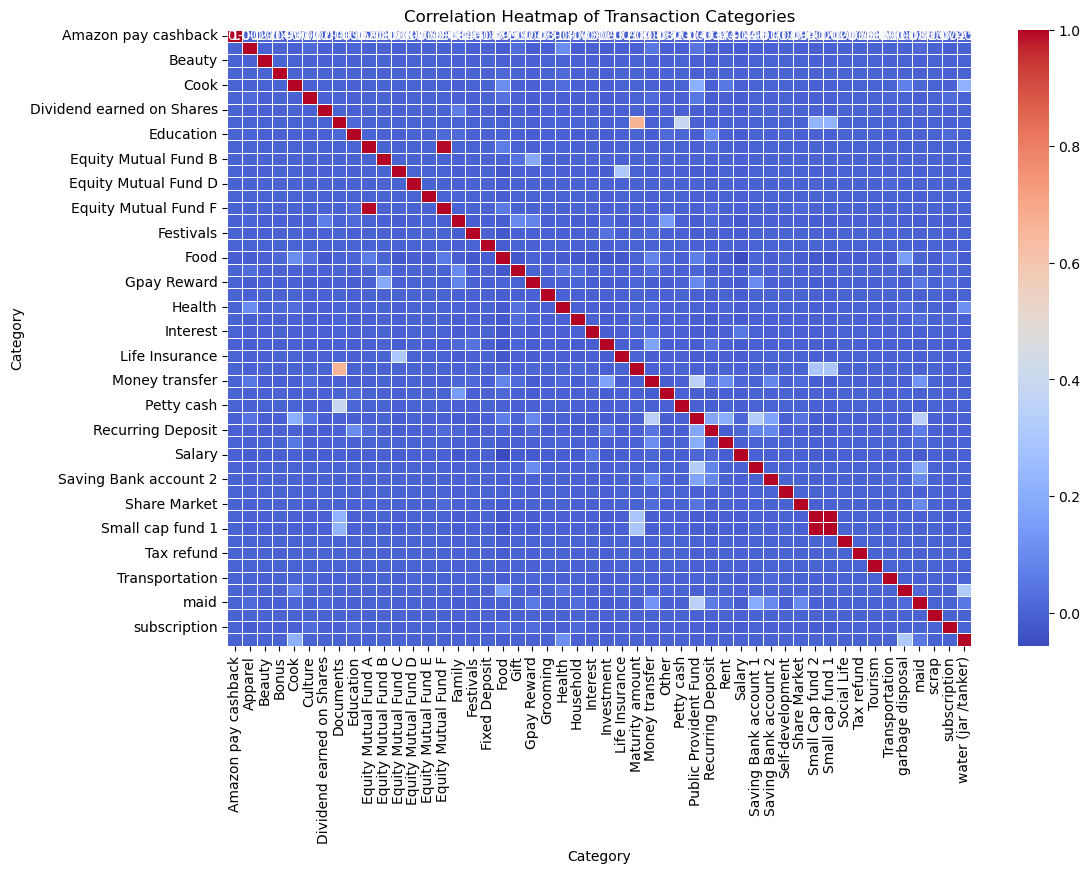

In [61]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()

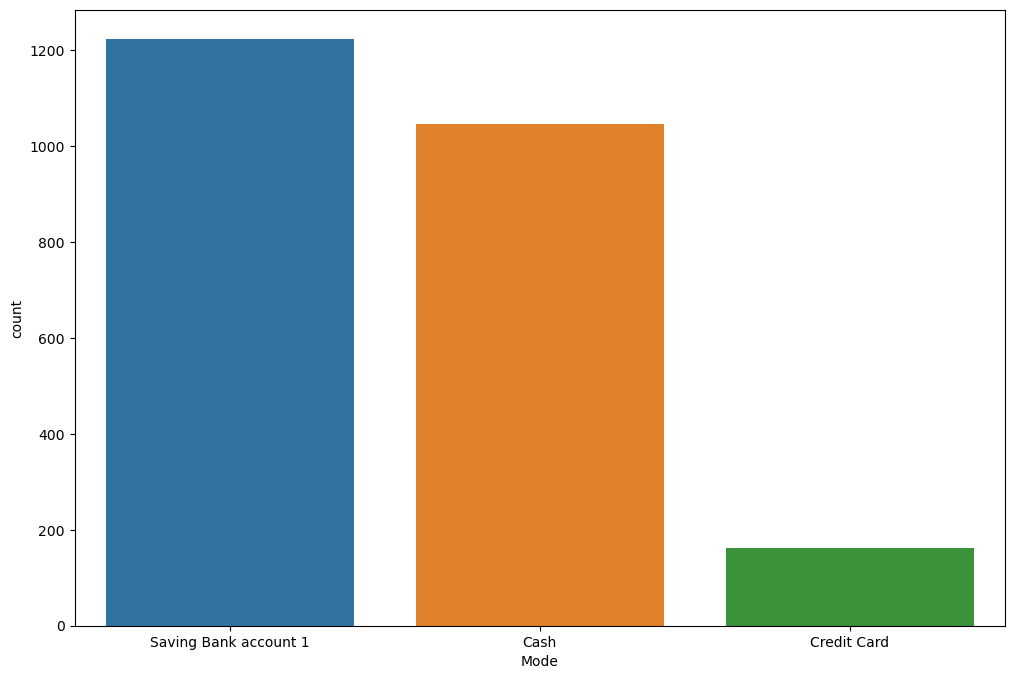

In [14]:
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = "Mode", order =
data["Mode"].value_counts().iloc[:3].index)
plt.show()

In [15]:
data["Category"].value_counts()

Food                         907
Transportation               307
Household                    176
subscription                 143
Other                        126
Investment                   103
Health                        94
Family                        71
Recurring Deposit             47
Apparel                       47
Money transfer                43
Salary                        43
Gift                          30
Public Provident Fund         29
Equity Mutual Fund E          22
Beauty                        22
Gpay Reward                   21
Education                     18
maid                          17
Saving Bank account 1         17
Festivals                     16
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Interest                      12
Dividend earned on Shares     12
Culture                       11
Small cap fund 1              10
Small Cap fund 2              10
Share Market                   8
Maturity amount                7
Life Insur

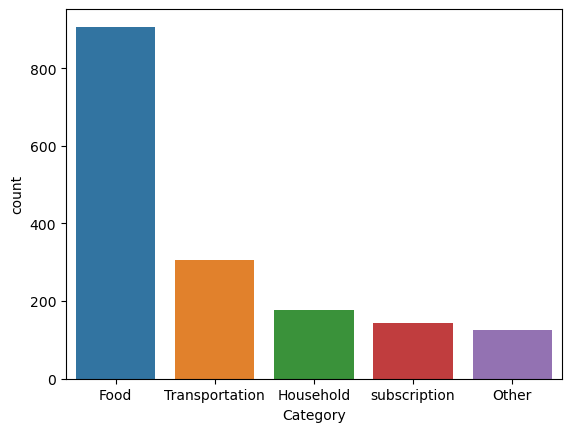

In [16]:
sns.countplot(data = data, x = "Category", order =
data["Category"].value_counts().iloc[:5].index);

In [17]:
data["Subcategory"].unique()

array(['Train', 'snacks', 'Netflix', 'Mobile Service Provider',
       'Ganesh Pujan', 'Tata Sky', 'auto', nan, 'Grocery', 'Lunch',
       'Milk', 'Pocket money', 'Laundry', 'breakfast', 'Dinner', 'Sweets',
       'Kirana', 'Ice cream', 'curd', 'Biscuits', 'Rajgira ladu',
       'Navratri', 'train', 'Tea', 'flour mill', 'Appliances',
       'home decor', 'grooming', 'Health', 'Clothing', 'clothes', 'Home',
       'chocolate', 'Medicine', 'Eating out', 'Movie', 'vegetables',
       'fruits', 'Potato', 'Onions', 'Taxi', 'Hardware', 'Eggs', 'Bread',
       'Petrol', 'Hospital', 'Mahanagar Gas', 'Lab Tests', 'Bus',
       'Travels', 'Kitchen', 'Footwear', 'Entry Fees', 'gadgets',
       'Accessories', 'misc', 'Stationary', 'Newspaper', 'Toiletries',
       'Bike', 'beverage', 'makeup', 'Books', 'Holi', 'Courier',
       'Leisure', 'Updation', 'Amazon Prime', 'Edtech Course', 'Hotstar',
       'Diwali', 'Wifi Internet Service', 'Trip', 'Furniture', 'Water',
       'Cable TV', 'medicine', 'M

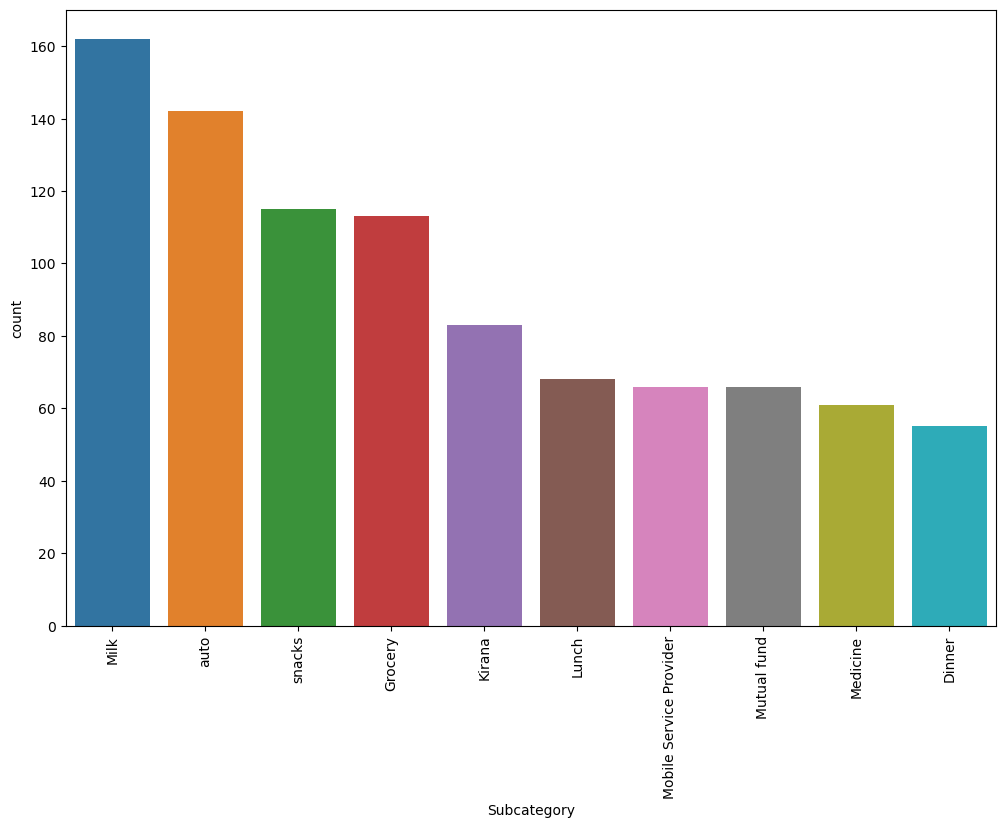

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = "Subcategory", order =
data["Subcategory"].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Income/Expense', ylabel='count'>

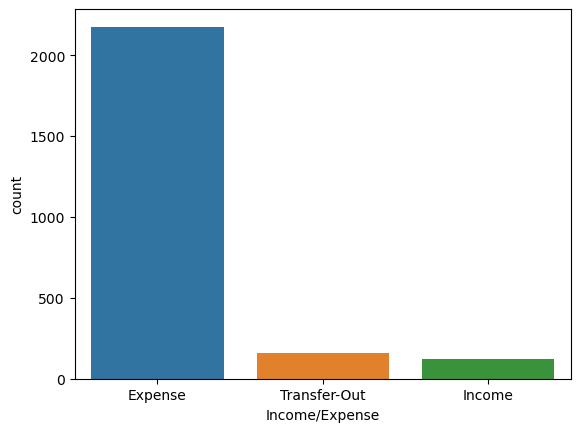

In [20]:
sns.countplot(data=data,x="Income/Expense")

In [21]:
data["Note"].nunique()

1057

In [22]:
data["Currency"].value_counts()

INR    2461
Name: Currency, dtype: int64

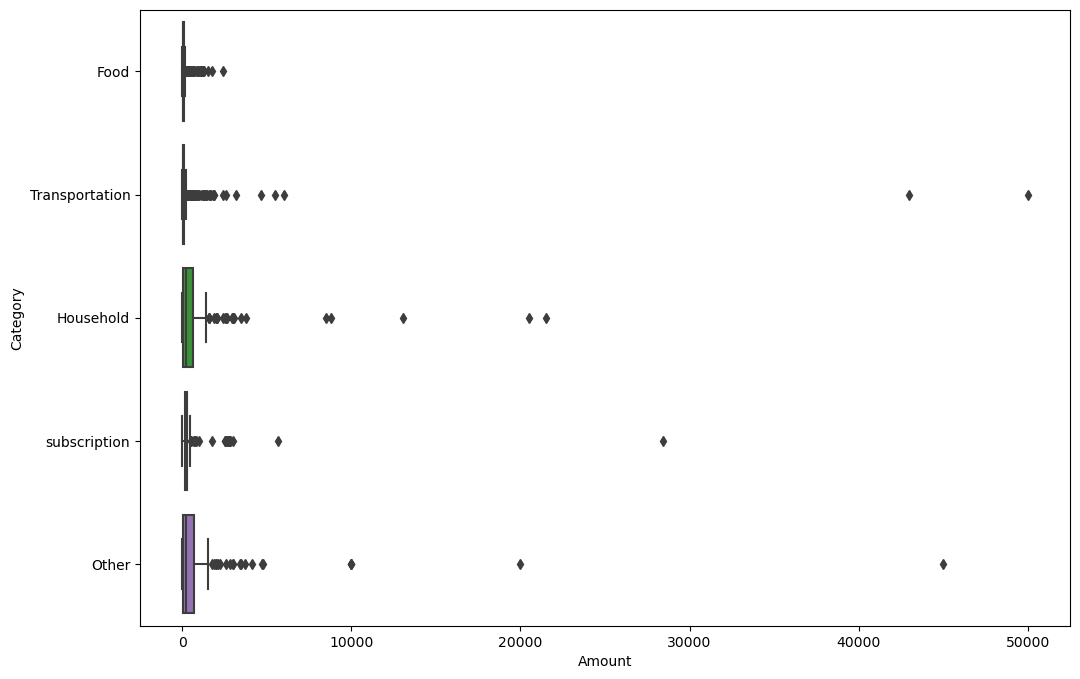

In [23]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data, x = "Amount", y = "Category", order =
data["Category"].value_counts().iloc[:5].index)
plt.show()

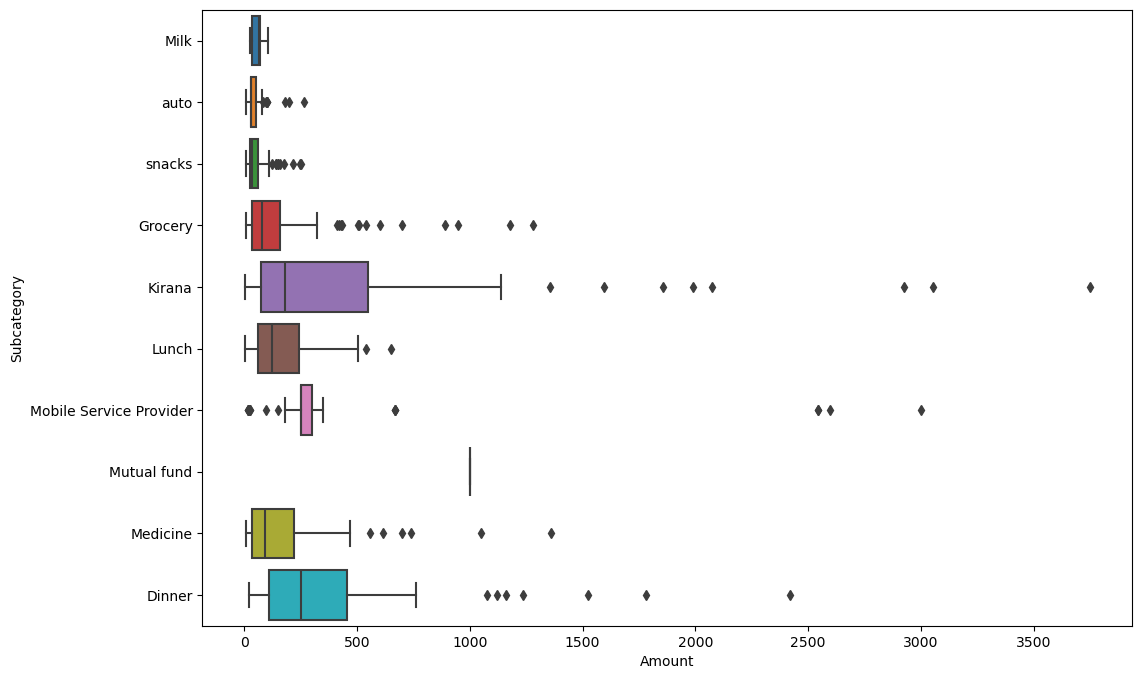

In [24]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data, x = "Amount", y = "Subcategory", order =
data["Subcategory"].value_counts().iloc[:10].index, )
plt.show()

<Axes: xlabel='Amount', ylabel='Income/Expense'>

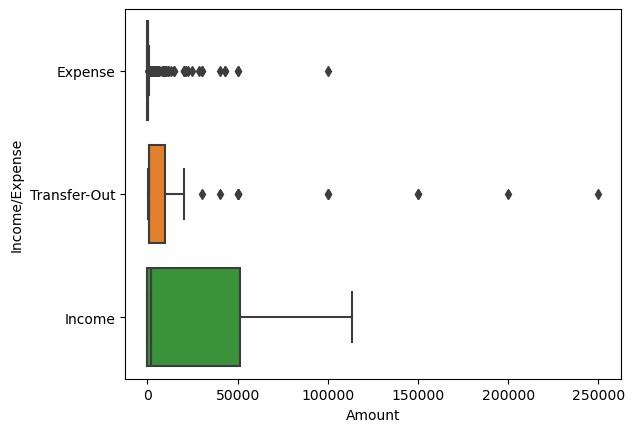

In [27]:
sns.boxplot(data = data, x = "Amount", y = "Income/Expense")

<Axes: xlabel='Income/Expense', ylabel='Mode'>

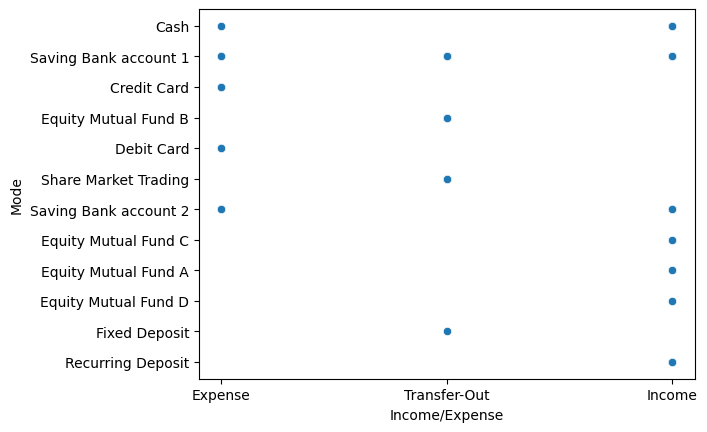

In [30]:
sns.scatterplot(data=data,x="Income/Expense",y="Mode",)